In [20]:
# standard library imports
import itertools
import re
import math
import warnings

# third-party imports
import numpy as np
import pandas as pd
# %matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud

# customisations
plt.style.use('default')
plt.rcdefaults()
# sns.set() # default seaborn style

In [21]:
df = pd.read_csv('../DS105L/steam_clean.csv')
df.head()

,appid,name,release_date,owners,ccu,price,languages,english,developer,publisher,...,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,ratings,median_owners,total_ratings
0,10,Counter-Strike,2000-11-01,10000000-20000000,12484,8.19,"English, French, German, Italian, Spanish - Sp...",1,Valve,Valve,...,Action,Action;FPS;Multiplayer,0,212609,5405,9302,181,96.315702,15000000.0,218014
1,20,Team Fortress Classic,1999-04-01,5000000-10000000,86,3.99,"English, French, German, Italian, Spanish - Sp...",1,Valve,Valve,...,Action,Action;FPS;Multiplayer,0,6242,978,1400,20,83.474384,7500000.0,7220
2,30,Day of Defeat,2003-05-01,1000000-2000000,127,3.99,"English, French, German, Italian, Spanish - Spain",1,Valve,Valve,...,Action,FPS;World War II;Multiplayer,0,5548,612,1624,20,86.808615,1500000.0,6160
3,40,Deathmatch Classic,2001-06-01,100000-200000,5,3.99,"English, French, German, Italian, Spanish - Sp...",1,Valve,Valve,...,Action,Action;FPS;Classic,0,2133,474,2425,11,77.986329,150000.0,2607
4,50,Half-Life: Opposing Force,1999-11-01,2000000-5000000,122,3.99,"English, French, German, Korean",1,Gearbox Software,Valve,...,Action,FPS;Action;Classic,0,16547,839,1282,127,92.656284,3500000.0,17386


In [22]:
def remove_non_english(df):
    """
    Remove non-english rows
    """
    # keep only rows marked as supporting english
    df = df[df['english'] == 1].copy()
    
    # keep rows which don't contain 3 or more non-ascii characters in succession
    df = df[~df['name'].str.contains('[^\u0001-\u007F]{3,}')]
    
    # remove english column, now redundant
    df = df.drop('english', axis=1)
    
    return df


# convert release_date to datetime type and create separate column for release_year
df['release_date'] = df['release_date'].astype('datetime64[ns]')
df['release_year'] = df['release_date'].apply(lambda x: x.year)

# remove non-windows and non-english games
df[df['platforms'].str.contains('windows')].drop('platforms', axis=1)
df = remove_non_english(df)

# create a new dataframe and keep the columns we want only
data = df[[
            'appid',
            'name', 
            'release_year',
            'median_owners',
            'ccu',
            'price',
            'developer',
            'publisher',
            'categories',
            'genres',
            'steamspy_tags',
            'achievements',
            'total_ratings',
            'ratings',
            'average_playtime',
            'median_playtime'
]]



data.head()

,appid,name,release_year,median_owners,ccu,price,developer,publisher,categories,genres,steamspy_tags,achievements,total_ratings,ratings,average_playtime,median_playtime
0,10,Counter-Strike,2000,15000000.0,12484,8.19,Valve,Valve,Multi-player;PvP;Online PvP;Shared/Split Scree...,Action,Action;FPS;Multiplayer,0,218014,96.315702,9302,181
1,20,Team Fortress Classic,1999,7500000.0,86,3.99,Valve,Valve,Multi-player;PvP;Online PvP;Shared/Split Scree...,Action,Action;FPS;Multiplayer,0,7220,83.474384,1400,20
2,30,Day of Defeat,2003,1500000.0,127,3.99,Valve,Valve,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,6160,86.808615,1624,20
3,40,Deathmatch Classic,2001,150000.0,5,3.99,Valve,Valve,Multi-player;PvP;Online PvP;Shared/Split Scree...,Action,Action;FPS;Classic,0,2607,77.986329,2425,11
4,50,Half-Life: Opposing Force,1999,3500000.0,122,3.99,Gearbox Software,Valve,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Classic,0,17386,92.656284,1282,127


In [23]:
data.to_csv('../DS105L/data_for_EDA1.csv', index=False)

## Owners, Pricing and Ratings

Furthermore, let's focus on some of the other relationships we observed in our initial EDA, specifically concerning the number of owners and ratings, and the price of a game and ratings.

In [24]:
display_cols = ['name', 'developer', 'publisher', 'release_year', 'genres', 'average_playtime', 'owners', 'ratings', 'price']
top_ten = df.sort_values(by='ratings', ascending=False).head(10)

display(top_ten[display_cols])


,name,developer,publisher,release_year,genres,average_playtime,owners,ratings,price
21,Portal 2,Valve,Valve,2011,Action;Adventure,973,10000000-20000000,97.697882,9.75
29602,People Playground,mestiez,Studio Minus,2019,Action;Casual;Indie;Simulation,2895,2000000-5000000,97.521999,8.19
47648,Vampire Survivors,poncle,poncle,2022,Action;Casual;Indie;RPG,1554,5000000-10000000,97.499159,4.99
30492,Hades,Supergiant Games,Supergiant Games,2020,Action;Indie;RPG,1843,5000000-10000000,97.322834,24.50
6659,Stardew Valley,ConcernedApe,ConcernedApe,2016,Indie;RPG;Simulation,3659,10000000-20000000,97.305036,13.99
7197,Wallpaper Engine,Wallpaper Engine Team,Wallpaper Engine Team,2018,Casual;Indie;Animation & Modeling;Design & Ill...,3638,20000000-50000000,97.248442,3.99
16,Portal,Valve,Valve,2007,Action,341,10000000-20000000,97.068921,9.75
988,Terraria,Re-Logic,Re-Logic,2011,Action;Adventure;Indie;RPG,6298,20000000-50000000,97.036303,9.99
2798,RimWorld,Ludeon Studios,Ludeon Studios,2018,Indie;Simulation;Strategy,12092,2000000-5000000,96.769626,31.99
10805,Half-Life: Alyx,Valve,Valve,2020,Action;Adventure,676,2000000-5000000,96.765972,58.99


One notable observation is that three of these games are both developed and published by Valve. It's worth mentioning that Valve is the company responsible for Steam, a digital content distribution platform primarily designed for their own games.

In addition, we could find that all of these games have achieved a significant milestone of having at least two million owners. And the price varaites from the lowest 3.99 to the highest 58.99. 

Continuing our analysis, we will now narrow our focus to paid games with 20,000 or more owners. Exploring the comparison between paid and free games could yield intriguing insights, but that discussion can be explored separately in the future.

Now, let's examine the distribution of ratings within our dataset.

/Users/wangyinyue/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


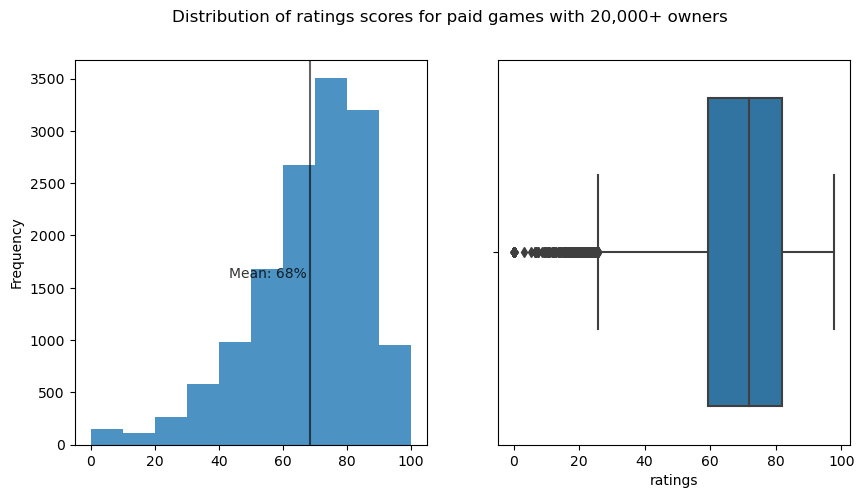

Mean ratings: 68.42%


In [25]:
# paid with over 20,000 owners
df = data[(data.median_owners >= 20000) & (data.price > 0)].copy()

fig, axarr = plt.subplots(1, 2, figsize=(10,5))

df.ratings.plot.hist(range=(0, 100), bins=10, ax=axarr[0], alpha=.8)
# sns.distplot(df.ratings, bins=range(0,100,10), ax=axarr[0])

# plot line for mean on histogram
mean = df.ratings.mean()
axarr[0].axvline(mean, c='black', alpha=.6)
axarr[0].text(mean-1, 1600, f'Mean: {mean:.0f}%', c='black', ha='right', alpha=.8)


ax = sns.boxplot(x='ratings', data=df, orient='v', ax=axarr[1])
fig.suptitle('Distribution of ratings scores for paid games with 20,000+ owners')
plt.show()

print(f'Mean ratings: {df.ratings.mean():.2f}%')

According to the plot, we could find the distribution of ratings is left-skewed with approximately half of the ratings falling within the 60% to 80% range, which indicates games generally receive a higher proportion of positive ratings compared to negative ratings. 

/Users/wangyinyue/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/wangyinyue/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1395: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/Users/wangyinyue/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/Users/wangyinyue/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:4011: RuntimeWarning: invalid value encountered in add
  lerp_interpolation = asanyarray(add(a, diff_b_a*t, out=out))


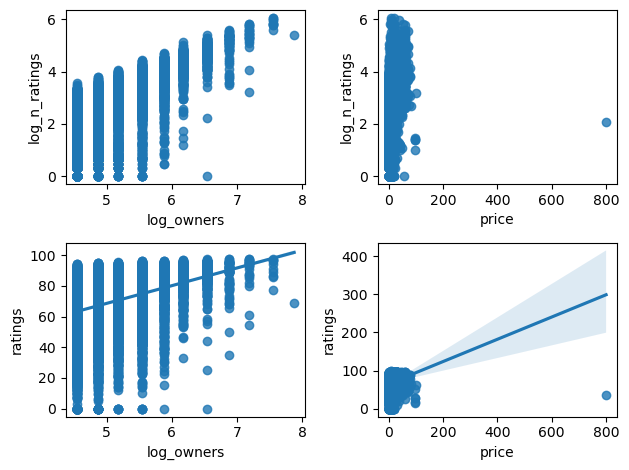

In [26]:
log_df = pd.DataFrame(zip(np.log10(df.median_owners), np.log10(df.total_ratings), df.ratings,df.price),
                      columns=['log_owners', 'log_n_ratings', 'ratings', 'price'])

fig, axarr = plt.subplots(2, 2)

sns.regplot(x='log_owners', y='log_n_ratings', data=log_df, ax=axarr[0][0])
sns.regplot(x='log_owners', y='ratings', data=log_df, ax=axarr[1][0])
sns.regplot(x='price', y='log_n_ratings', data=log_df, ax=axarr[0][1])
sns.regplot(x='price', y='ratings', data=log_df, ax=axarr[1][1])

plt.tight_layout()
plt.show()

Upon initial examination of the two plots on the left, it showed that the more owners of a game, the more times that game is likely to have been rated. The increasing tend also implays the rating score will be higher with a larger number of owners. This relationship is quite intuitive, as it is expected that better games would gain more popularity and consequently receive more positive ratings. 
There are also a few exceptions that deviate from the observed trend. It is important to note, however, even if a game receives high ratings, it doesn't guarantee that it will achieve widespread popularity. Several factors can influence the popularity of a game, such as marketing and promotion, visual and audio Appeal, continued support and updates,etc. 

For the two plots on the righ, comparing the price of a game to the number of ratings and the rating score, we could not clearly identify the relationship between price and ratings. It is probably because the rating of a game typically reflects the overall quality, gameplay experience, graphics, story, and other factors that contribute to the enjoyment and satisfaction of players. While price can be a factor that affects owners' expectations and initial interest in a game, it does not necessarily determine the actual quality or the rating it receives.

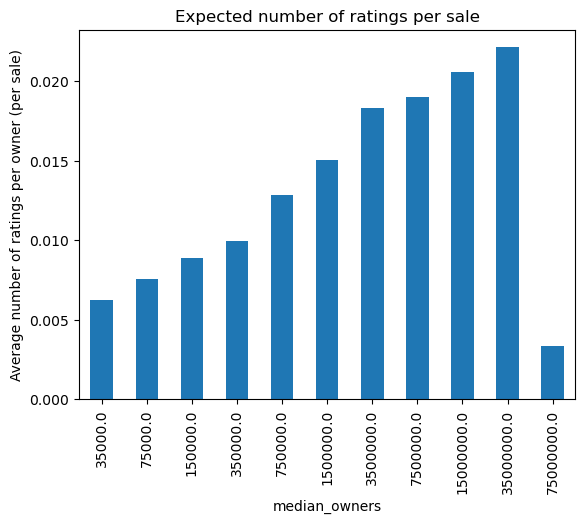

In [27]:
grp = df.groupby('median_owners')

ax = (grp['total_ratings'].mean() / sorted(df['median_owners'].unique())).plot.bar()
ax.set_ylabel('Average number of ratings per owner (per sale)')
ax.set_title('Expected number of ratings per sale');

Based on the estimation from the data, the average number of ratings per owner typically increases with the number of game owners as more popular games tend to attract a larger player base, which, in turn, increases the likelihood of receiving ratings. However, exceptions also appear in this trend, as seen in cases like Apex Legends™ and New World. These games classify into the highesr number of median owners,75000000, but with a relatively lower number of ratings. 

Several factors can contribute to this discrepancy. First of all, compared to other games, Apex Legends™ and New World might be relatively new games, which was launched in 2020 and 2021 separately. As the result, games that have been on the market for a shorter period have not had as much time to accumulate ratings. In addition, despite having a large player base, the absence of incentives offered by Apex Legends™ and New World could contribute to the lower number of ratings despite having a large player base. 

## Pricing

When analyzing the pricing aspect of this dataset, one notable limitation is the absence of the original release prices for the games. Instead, the dataset includes the current prices, which may have undergone several reductions over time, particularly for older games. Fortunately, Steam's frequent sale model has led to a trend of games maintaining higher base prices and frequently lowering them during sale events. To mitigate the impact of diminishing prices, the next section will focus exclusively on recent releases.

Now, we're going to take a quick look at the breakdown of pricing strategy for games in each genre.

In [36]:
df1 = pd.read_csv('../DS105L/data_genres_EDA.csv')

ParserError: Error tokenizing data. C error: Expected 1 fields in line 28, saw 367


In [ ]:
gen_cols = [
        # 'Accounting',
        'Action',
        'Adventure',
        # 'Animation & Modeling',
        # 'Audio Production',
        'Casual',
        # 'Design & Illustration',
        # 'Documentary',
        # 'Early Access',
        # 'Education',
        # 'Free to Play',
        # 'Game Development',
        # 'Gore',
        'Indie',
        'Massively Multiplayer',
        # 'Nudity',
        # 'Photo Editing',
        'RPG',
        'Racing',
        # 'Sexual Content',
        'Simulation',
        # 'Software Training',
        'Sports',
        'Strategy'
        # 'Tutorial',
        # 'Utilities',
        # 'Video Production',
        # 'Violent',
        # 'Web Publishing'
    ]

g_df = pd.DataFrame()

for col in gen_cols:
    temp_df = df[df[col] == 1].copy()
    temp_df['genres'] = col
    g_df = pd.concat([g_df, temp_df], axis=0)


recent_df = g_df[g_df['release_year'] >= 2018].copy()
ax = sns.stripplot(x='price', y='genres', data=recent_df, jitter=True, alpha=.5, linewidth=1);